# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [7]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix of X_train
    covariance_matrix = np.dot(X_train.T, X_train)

    # Step 2: Perform eigenvalue decomposition of the covariance matrix
    U, S, Vt = np.linalg.svd(covariance_matrix, full_matrices=False)

    # Step 3: Keep only the top `n_components` singular values and vectors
    U_reduced = U[:, :n_components]

    # Step 4: Project the original data onto the reduced space
    X_train_reduced = np.dot(X_train, U_reduced)
    X_test_reduced = np.dot(X_test, U_reduced)

    return X_train_reduced, X_test_reduced, U


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [9]:
svd_components = [32, 64, 128, 256]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, U = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results
    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


# Store top 5 singular vectors
singular_vectors_top5 = U[:, :5]


Training models with different levels of SVD preprocessing...
Applying custom SVD with 32 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 32, Accuracy: 0.8975, Training time: 5.4091 seconds
Applying custom SVD with 64 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 64, Accuracy: 0.9137, Training time: 20.0260 seconds
Applying custom SVD with 128 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 128, Accuracy: 0.9199, Training time: 78.2279 seconds
Applying custom SVD with 256 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 256, Accuracy: 0.9210, Training time: 213.4158 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


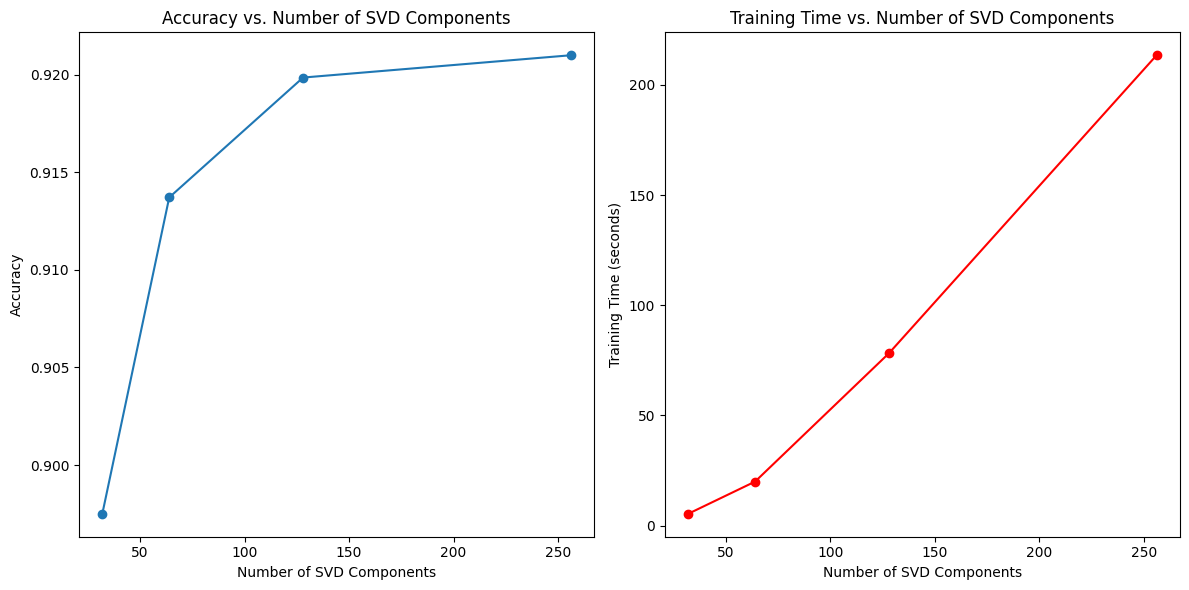

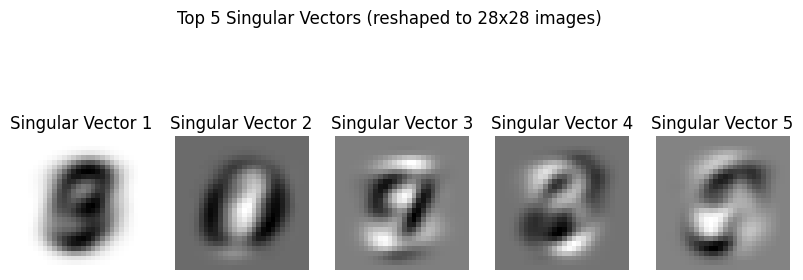

In [10]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
svd_components, accuracies, training_times = zip(*results)

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(svd_components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')

# Plot training time
plt.subplot(1, 2, 2)
plt.plot(svd_components, training_times, marker='o', color='red')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

# Visualize Top 5 Singular Vectors
plt.figure(figsize=(10, 4))

for i in range(5):
    singular_vector = singular_vectors_top5[:, i].reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(singular_vector, cmap='gray')
    plt.title(f"Singular Vector {i+1}")
    plt.axis('off')

plt.suptitle('Top 5 Singular Vectors (reshaped to 28x28 images)')
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

As the number of components increases, the model could retain more information from the original dataset, which leads to higher accuracy. After a certain point (e.g. in this assignment when number of svd components = 128), increasing components will not significantly increase the accuracy.

As the number of components increases, the training time also increases since the logistic regression model has more dimensions to work with. Thus we need to find a balance between dimensionality and training time.

The top singular vectors represent the most important patterns in the figure of MNIST dataset. In this example, these vectors are the key features of handwritten digits.